In [55]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

In [56]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='sex', ylabel='pclass'>

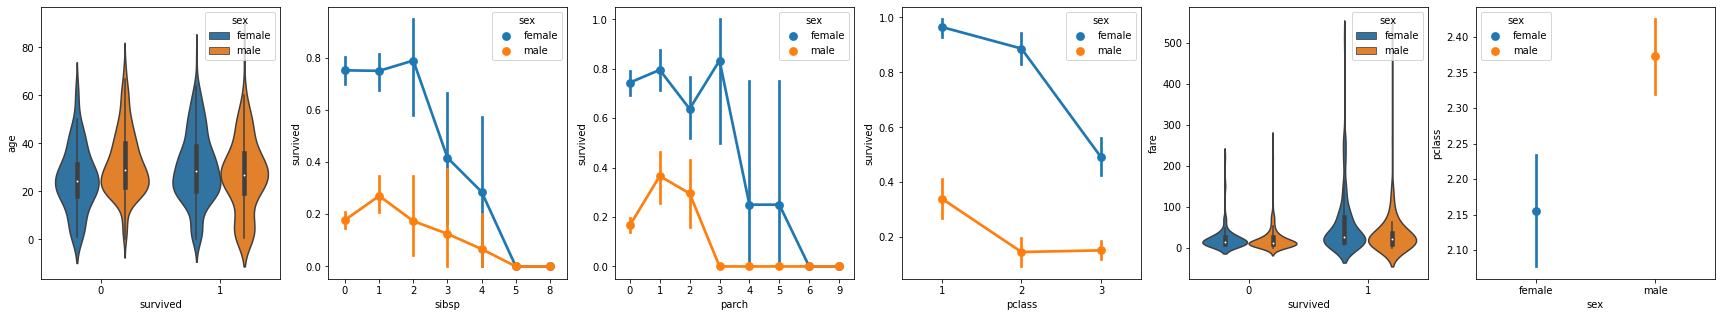

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(ncols=6, figsize=(30,5))

sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
sns.pointplot(x="sex", y="pclass", hue="sex", data=data, ax=axs[5])


In [58]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [59]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [60]:
data['relatives'] = data.apply((lambda row: int(row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


<AxesSubplot:xlabel='survived', ylabel='relatives'>

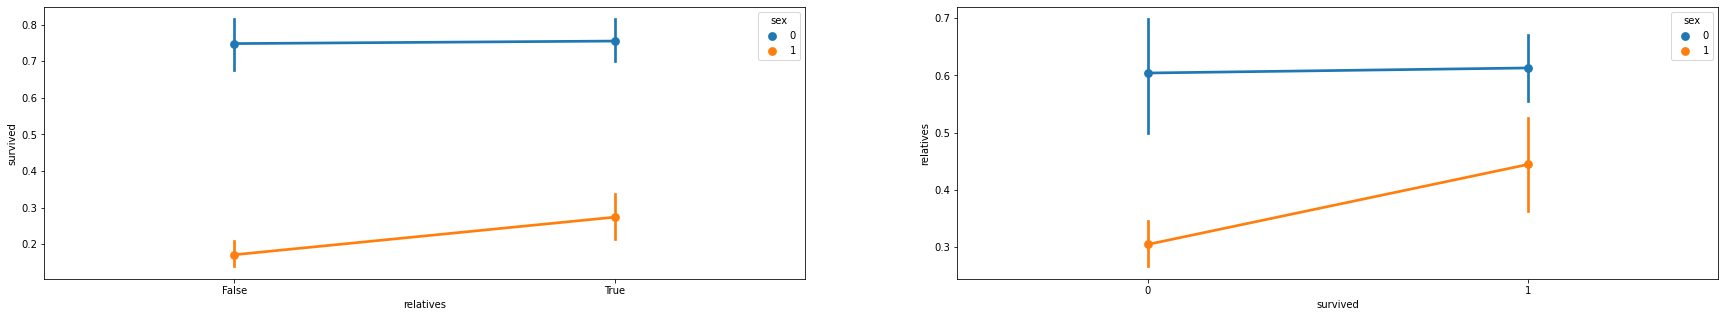

In [80]:
fig, axs = plt.subplots(ncols=2, figsize=(30,5))

sns.pointplot(x="relatives", y="survived", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="survived", y="relatives", hue="sex", data=data, ax=axs[1])

In [73]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [66]:
from sklearn import metrics

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [67]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [68]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5751
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5760
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5896
Epoch 4/50
27/27 [==============================] - 0s 9ms/step - loss: 0.6804 - accuracy: 0.5793
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6016
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.7465
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.7502
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7525
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7587
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7854
Epoch 11/50
27/27 [

In [71]:
# y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))

0.7942583732057417
